In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

In [5]:
from keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
x_train.shape

(60000, 784)

In [8]:
y_train.shape

(60000, 10)

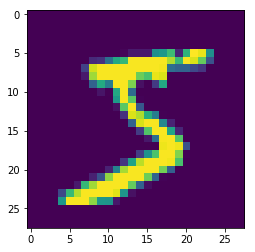

In [9]:
plt.imshow(np.reshape(x_train[0],(28,28)))

In [10]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [12]:
print(np.argmax(y_train[0], axis=0))

5


In [13]:
model = Sequential()

model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s - loss: 0.3957 - acc: 0.8847 - val_loss: 0.2372 - val_acc: 0.9282

In [18]:
model.predict_classes(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s


array([7], dtype=int64)

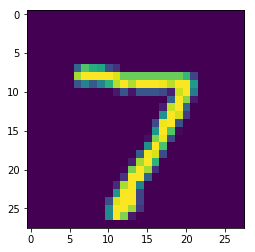

In [19]:
plt.imshow(np.reshape(x_test[0], (28,28)))

In [21]:
np.argmax(y_test[0])

7

In [52]:
predictions = model.predict(x_test, batch_size=32)

In [53]:
predictions[0], np.argmax(predictions[0])

(array([  3.98564822e-07,   9.85987663e-06,   1.01008336e-03,
          1.43895610e-04,   1.19034524e-08,   5.22065375e-06,
          1.15680210e-09,   9.98735964e-01,   8.86406451e-06,
          8.56789993e-05], dtype=float32), 7)

In [47]:
len(predictions)

10000

In [29]:
y_test[0].astype(bool)

array([False, False, False, False, False, False, False,  True, False, False], dtype=bool)

In [58]:
preds = np.equal(np.argmax(predictions,1), np.argmax(y_test,1))

In [63]:
accuracy = preds.astype(int)

In [64]:
accuracy[0]

1

In [65]:
acc = np.sum(accuracy, axis=0)/len(accuracy)

In [66]:
acc

0.95740000000000003